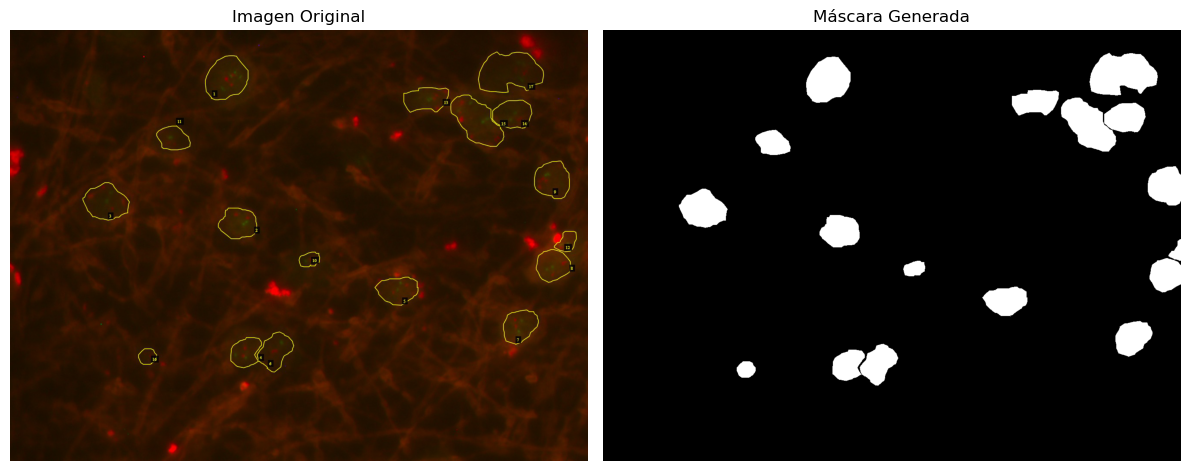

In [32]:
import json
import numpy as np
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

# Función para generar una etiqueta de imagen a partir de las coordenadas
def generar_etiquetas_imagen_con_resolucion(json_path, ruta_original, output_folder):
    # Cargar el archivo JSON
    with open(json_path, 'r') as file:
        data = json.load(file)

    # Cargar la imagen original para obtener sus dimensiones
    imagen_original = Image.open(ruta_original)
    imagen_original = imagen_original.convert("RGB")  # Asegurarse de que está en formato RGB
    ancho_original, alto_original = imagen_original.size

    # Crear carpeta de salida si no existe
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterar sobre cada imagen en el JSON
    for img_key, img_data in data.items():
        filename = img_data.get("filename", "unknown")
        width = img_data.get("width", ancho_original)  # Usar las dimensiones de la imagen en el JSON
        height = img_data.get("height", alto_original)  # Usar las dimensiones de la imagen en el JSON
        regions = img_data.get("regions", [])
        
        # Crear una imagen en blanco para la máscara con las dimensiones exactas de la imagen
        mask = Image.new('L', (width, height), 0)  # 'L' significa imagen en escala de grises
        draw = ImageDraw.Draw(mask)

        # Iterar sobre cada región para dibujarla
        for region in regions:
            shape_attributes = region.get("shape_attributes", {})
            all_points_x = shape_attributes.get("all_points_x", [])
            all_points_y = shape_attributes.get("all_points_y", [])
            
            # Dibujar el polígono en la imagen de la máscara (donde la región es blanca)
            points = list(zip(all_points_x, all_points_y))
            draw.polygon(points, fill=255)  # 255 para blanco (área etiquetada)

        # Guardar la máscara generada como PNG o JPG
        output_path = os.path.join(output_folder, f"{filename}_mask_binaria.png")  # Cambia la extensión si prefieres JPG
        mask.save(output_path)
        
        # Visualizar ambas imágenes (original y máscara) lado a lado con matplotlib
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Crear una figura con dos subgráficos

        # Convertir la imagen original de PIL a un array de NumPy para usar en matplotlib
        imagen_original_np = np.array(imagen_original)

        # Mostrar la imagen original en el primer subgráfico
        axes[0].imshow(imagen_original_np)
        axes[0].set_title("Imagen Original")
        axes[0].axis('off')  # Ocultar los ejes

        # Mostrar la máscara generada en el segundo subgráfico
        axes[1].imshow(mask, cmap='gray')  # Mostrar en escala de grises
        axes[1].set_title("Máscara Generada")
        axes[1].axis('off')  # Ocultar los ejes

        # Mostrar las dos imágenes
        plt.tight_layout()
        plt.show()

# Ruta del archivo JSON de entrada
json_path = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/seg6.json"  # Cambia esto a la ruta de tu archivo JSON
ruta_original = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/img6_seg.jpg"  # Ruta a la imagen original (la que quieres que tenga la misma resolución)
# Carpeta de salida para las imágenes de etiquetas
output_folder = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg"  # Cambia esto si prefieres otro nombre de carpeta

# Llamar a la función para generar las imágenes de etiquetas con la resolución de la imagen original
generar_etiquetas_imagen_con_resolucion(json_path, ruta_original, output_folder)


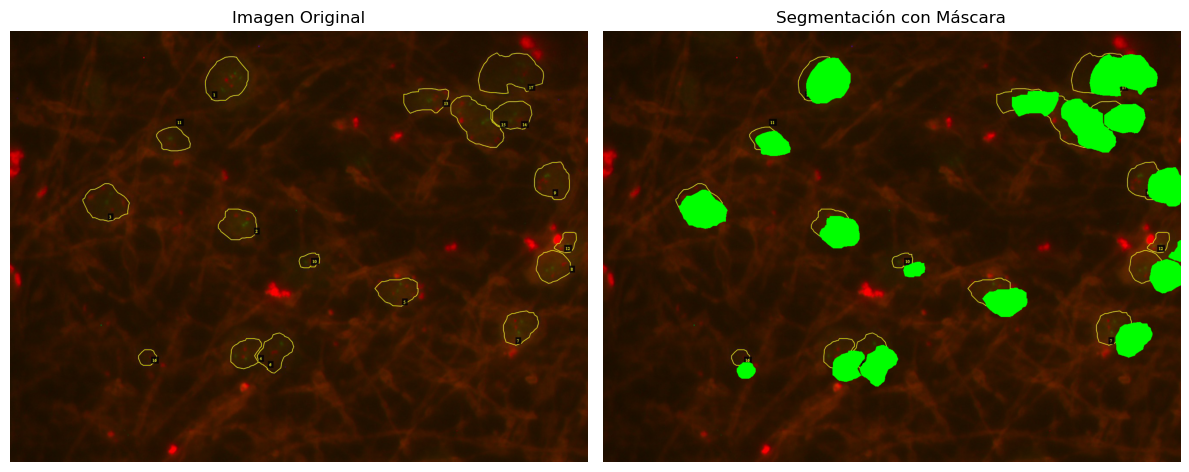

In [35]:
import json
import numpy as np
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

# Función para generar una etiqueta de imagen a partir de las coordenadas
def generar_etiquetas_imagen_con_resolucion(json_path, ruta_original, output_folder):
    # Cargar el archivo JSON
    with open(json_path, 'r') as file:
        data = json.load(file)

    # Cargar la imagen original para obtener sus dimensiones
    imagen_original = Image.open(ruta_original)
    imagen_original = imagen_original.convert("RGB")  # Asegurarse de que está en formato RGB
    ancho_original, alto_original = imagen_original.size

    # Crear carpeta de salida si no existe
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterar sobre cada imagen en el JSON
    for img_key, img_data in data.items():
        filename = img_data.get("filename", "unknown")
        width = img_data.get("width", ancho_original)  # Usar las dimensiones de la imagen en el JSON
        height = img_data.get("height", alto_original)  # Usar las dimensiones de la imagen en el JSON
        regions = img_data.get("regions", [])
        
        # Crear una imagen en blanco para la máscara con las dimensiones exactas de la imagen original
        mask = Image.new('L', (width, height), 0)  # 'L' significa imagen en escala de grises
        draw = ImageDraw.Draw(mask)

        # Iterar sobre cada región para dibujarla
        for region in regions:
            shape_attributes = region.get("shape_attributes", {})
            all_points_x = shape_attributes.get("all_points_x", [])
            all_points_y = shape_attributes.get("all_points_y", [])
            
            # Dibujar el polígono en la imagen de la máscara (donde la región es blanca)
            points = list(zip(all_points_x, all_points_y))
            draw.polygon(points, fill=255)  # 255 para blanco (área etiquetada)

        # Escalar la máscara si las dimensiones no coinciden con las de la imagen original
        if (width, height) != (ancho_original, alto_original):
            mask = mask.resize((ancho_original, alto_original), Image.Resampling.LANCZOS)

        # Guardar la máscara generada como PNG o JPG
        output_path = os.path.join(output_folder, f"{filename}_mask_mascara.png")  # Cambia la extensión si prefieres JPG
        mask.save(output_path)
        
        # Visualizar ambas imágenes (original y máscara) lado a lado con matplotlib
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Crear una figura con dos subgráficos

        # Convertir la imagen original de PIL a un array de NumPy para usar en matplotlib
        imagen_original_np = np.array(imagen_original)

        # Mostrar la imagen original en el primer subgráfico
        axes[0].imshow(imagen_original_np)
        axes[0].set_title("Imagen Original")
        axes[0].axis('off')  # Ocultar los ejes

        # Convertir la máscara a un array de NumPy para la visualización
        mask_np = np.array(mask)

        # Superponer la máscara sobre la imagen original para mostrar la segmentación
        overlay = np.copy(imagen_original_np)
        overlay[mask_np == 255] = [0, 255, 0]  # Superponer la máscara en color verde

        # Mostrar la imagen con la máscara superpuesta en el segundo subgráfico
        axes[1].imshow(overlay)
        axes[1].set_title("Segmentación con Máscara")
        axes[1].axis('off')  # Ocultar los ejes

        # Mostrar las dos imágenes
        plt.tight_layout()
        plt.show()

# Ruta del archivo JSON de entrada
json_path = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/seg6.json"  # Cambia esto a la ruta de tu archivo JSON
ruta_original = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/img6_seg.jpg"  # Ruta a la imagen original (la que quieres que tenga la misma resolución)
# Carpeta de salida para las imágenes de etiquetas
output_folder = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg"  # Cambia esto si prefieres otro nombre de carpeta

# Llamar a la función para generar las imágenes de etiquetas con la resolución de la imagen original
generar_etiquetas_imagen_con_resolucion(json_path, ruta_original, output_folder)


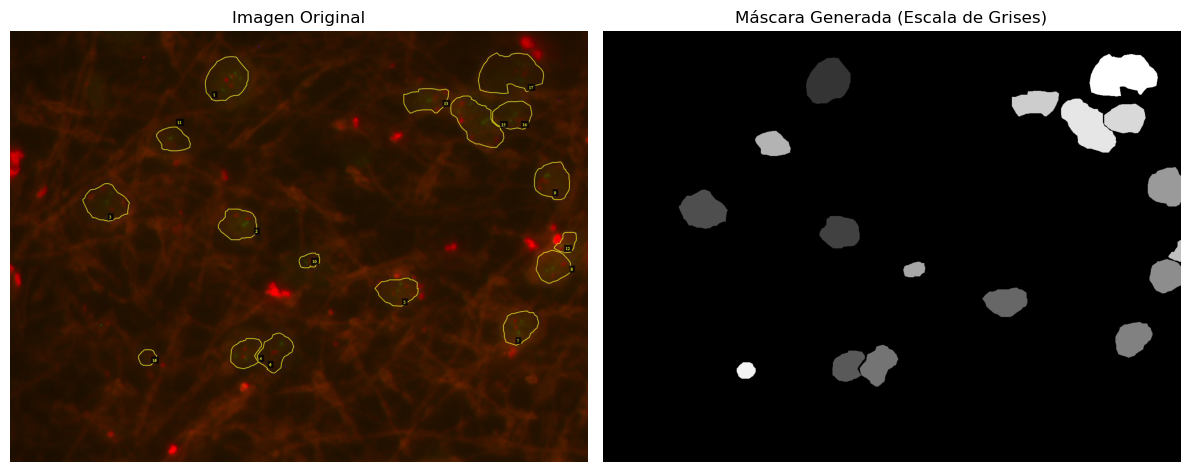

In [39]:
import json
import numpy as np
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

# Función para generar una etiqueta de imagen a partir de las coordenadas con escala de gris
def generar_etiquetas_imagen_con_resolucion(json_path, ruta_original, output_folder):
    # Cargar el archivo JSON
    with open(json_path, 'r') as file:
        data = json.load(file)

    # Cargar la imagen original para obtener sus dimensiones
    imagen_original = Image.open(ruta_original)
    imagen_original = imagen_original.convert("RGB")  
    ancho_original, alto_original = imagen_original.size

    # Iterar sobre cada imagen en el JSON
    for img_key, img_data in data.items():
        filename = img_data.get("filename", "unknown")
        width = img_data.get("width", ancho_original)  # Usar las dimensiones de la imagen en el JSON
        height = img_data.get("height", alto_original)  # Usar las dimensiones de la imagen en el JSON
        regions = img_data.get("regions", [])
        
        # Crear una imagen en blanco para la máscara con las dimensiones exactas de la imagen
        mask = Image.new('L', (width, height), 0)  # 'L' significa imagen en escala de grises
        draw = ImageDraw.Draw(mask)

        # Establecer el color inicial (gris oscuro)
        color_base = 50  # Gris oscuro inicial
        step = (255 - color_base) / len(regions)  # Ajustar la intensidad de gris por cada célula

        # Iterar sobre cada región para dibujarla
        for i, region in enumerate(regions):
            shape_attributes = region.get("shape_attributes", {})
            all_points_x = shape_attributes.get("all_points_x", [])
            all_points_y = shape_attributes.get("all_points_y", [])

            # Calcular el valor de gris para esta región (de gris oscuro a blanco)
            intensity = int(color_base + i * step)  # Incrementar la intensidad por cada célula
            
            # Dibujar el polígono en la imagen de la máscara (con intensidad de gris)
            points = list(zip(all_points_x, all_points_y))
            draw.polygon(points, fill=intensity)  # Usar el valor calculado para el color

        # Guardar la máscara generada como PNG o JPG
        output_path = os.path.join(output_folder, f"{filename}_mask_intesidad.png")  # Cambia la extensión si prefieres JPG
        mask.save(output_path)
        
        # Visualizar ambas imágenes (original y máscara) lado a lado con matplotlib
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Crear una figura con dos subgráficos

        # Convertir la imagen original de PIL a un array de NumPy para usar en matplotlib
        imagen_original_np = np.array(imagen_original)

        # Mostrar la imagen original en el primer subgráfico
        axes[0].imshow(imagen_original_np)
        axes[0].set_title("Imagen Original")
        axes[0].axis('off')  # Ocultar los ejes

        # Mostrar la máscara generada en el segundo subgráfico
        axes[1].imshow(mask, cmap='gray')  # Mostrar en escala de grises
        axes[1].set_title("Máscara Generada (Escala de Grises)")
        axes[1].axis('off')  # Ocultar los ejes

        # Mostrar las dos imágenes
        plt.tight_layout()
        plt.show()
        
# Ruta del archivo JSON de entrada
json_path = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/seg6.json"  # Cambia esto a la ruta de tu archivo JSON
ruta_original = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/img6_seg.jpg"  # Ruta a la imagen original (la que quieres que tenga la misma resolución)
# Carpeta de salida para las imágenes de etiquetas
output_folder = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg"  # Cambia esto si prefieres otro nombre de carpeta

# Llamar a la función para generar las imágenes de etiquetas con la resolución de la imagen original
generar_etiquetas_imagen_con_resolucion(json_path, ruta_original, output_folder)

In [1]:
print("hello world")

hello world


Introduce el tamaño de la imagen manualmente (0 para usar tamaño original):
Ancho de la imagen: 1392
Alto de la imagen: 1040


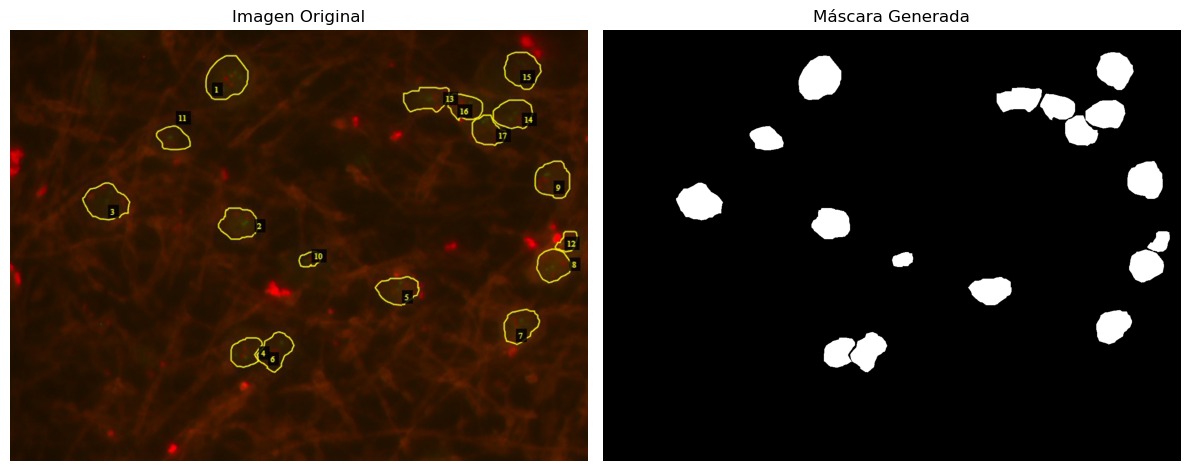

In [3]:
import json
import numpy as np
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

# Función para generar una etiqueta de imagen a partir de las coordenadas
def generar_etiquetas_imagen_con_resolucion(json_path, ruta_original, output_folder, ancho_manual, alto_manual):
    # Cargar el archivo JSON
    with open(json_path, 'r') as file:
        data = json.load(file)

    # Cargar la imagen original para obtener sus dimensiones
    imagen_original = Image.open(ruta_original)
    imagen_original = imagen_original.convert("RGB")  # Asegurarse de que está en formato RGB
    ancho_original, alto_original = imagen_original.size

    # Si el usuario especificó dimensiones manualmente, usarlas
    if ancho_manual > 0 and alto_manual > 0:
        ancho_final, alto_final = ancho_manual, alto_manual
    else:
        ancho_final, alto_final = ancho_original, alto_original

    # Crear carpeta de salida si no existe
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterar sobre cada imagen en el JSON
    for img_key, img_data in data.items():
        filename = img_data.get("filename", "unknown")
        width = img_data.get("width", ancho_final)  # Usar dimensiones manuales o predeterminadas
        height = img_data.get("height", alto_final)  # Usar dimensiones manuales o predeterminadas
        regions = img_data.get("regions", [])
        
        # Crear una imagen en blanco para la máscara con las dimensiones exactas de la imagen
        mask = Image.new('L', (width, height), 0)  # 'L' significa imagen en escala de grises
        draw = ImageDraw.Draw(mask)

        # Iterar sobre cada región para dibujarla
        for region in regions:
            shape_attributes = region.get("shape_attributes", {})
            all_points_x = shape_attributes.get("all_points_x", [])
            all_points_y = shape_attributes.get("all_points_y", [])
            
            # Dibujar el polígono en la imagen de la máscara (donde la región es blanca)
            points = list(zip(all_points_x, all_points_y))
            draw.polygon(points, fill=255)  # 255 para blanco (área etiquetada)

        # Guardar la máscara generada como PNG o JPG
        output_path = os.path.join(output_folder, f"{filename}_mask_binaria.png")  # Cambia la extensión si prefieres JPG
        mask.save(output_path)
        
        # Visualizar ambas imágenes (original y máscara) lado a lado con matplotlib
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Crear una figura con dos subgráficos

        # Redimensionar la imagen original si es necesario
        imagen_redimensionada = imagen_original.resize((width, height))
        imagen_original_np = np.array(imagen_redimensionada)

        # Mostrar la imagen original en el primer subgráfico
        axes[0].imshow(imagen_original_np)
        axes[0].set_title("Imagen Original")
        axes[0].axis('off')  # Ocultar los ejes

        # Mostrar la máscara generada en el segundo subgráfico
        axes[1].imshow(mask, cmap='gray')  # Mostrar en escala de grises
        axes[1].set_title("Máscara Generada")
        axes[1].axis('off')  # Ocultar los ejes

        # Mostrar las dos imágenes
        plt.tight_layout()
        plt.show()

# --------------------- INPUT DEL USUARIO ---------------------
# Pedir al usuario introducir las dimensiones manuales
print("Introduce el tamaño de la imagen manualmente (0 para usar tamaño original):")
ancho_manual = int(input("Ancho de la imagen: "))
alto_manual = int(input("Alto de la imagen: "))

# Ruta del archivo JSON de entrada
json_path = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/seg6.json"  # Cambia esto a la ruta de tu archivo JSON
ruta_original = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/img6_seg.jpg"  # Ruta a la imagen original
output_folder = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/Etiqutas_seg"  # Carpeta de salida para las máscaras

# Llamar a la función para generar las imágenes de etiquetas
generar_etiquetas_imagen_con_resolucion(json_path, ruta_original, output_folder, ancho_manual, alto_manual)


Introduce el ancho de la imagen: 1392
Introduce el alto de la imagen: 1040
Redimensionando máscara de (1040, 1392) a (516, 690)


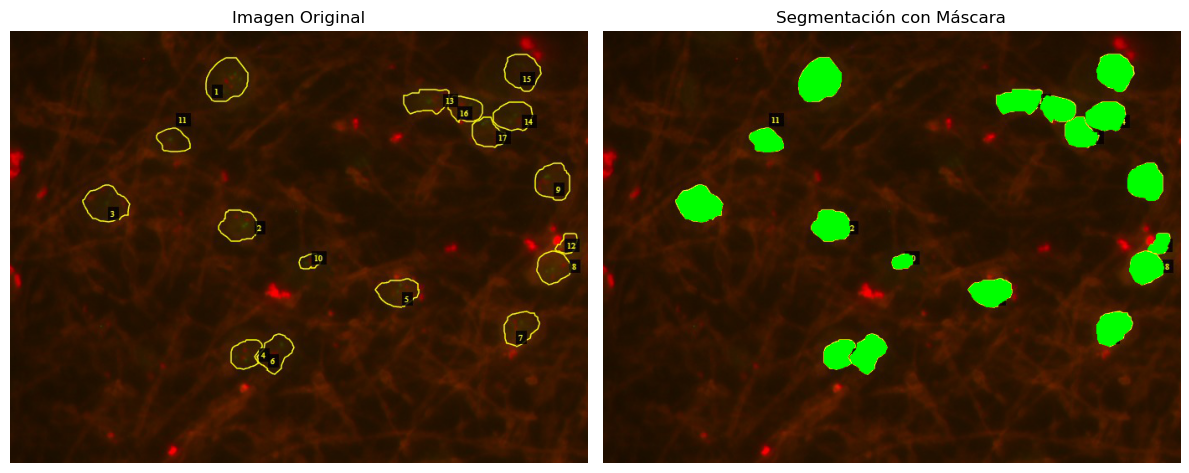

In [6]:
import json
import numpy as np
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

# Función para generar una etiqueta de imagen a partir de las coordenadas
def generar_etiquetas_imagen_con_resolucion(json_path, ruta_original, output_folder, ancho_manual=None, alto_manual=None):
    # Cargar el archivo JSON
    with open(json_path, 'r') as file:
        data = json.load(file)

    # Cargar la imagen original para obtener sus dimensiones
    imagen_original = Image.open(ruta_original)
    imagen_original = imagen_original.convert("RGB")  # Asegurarse de que está en formato RGB
    ancho_original, alto_original = imagen_original.size

    # Sobrescribir dimensiones si se ingresan manualmente
    if ancho_manual and alto_manual:
        ancho_original = ancho_manual
        alto_original = alto_manual

    # Crear carpeta de salida si no existe
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterar sobre cada imagen en el JSON
    for img_key, img_data in data.items():
        filename = img_data.get("filename", "unknown")
        width = img_data.get("width", ancho_original)  # Usar dimensiones de imagen original o manuales
        height = img_data.get("height", alto_original)
        regions = img_data.get("regions", [])
        
        # Crear una imagen en blanco para la máscara con las dimensiones especificadas
        mask = Image.new('L', (width, height), 0)  # 'L' significa imagen en escala de grises
        draw = ImageDraw.Draw(mask)

        # Iterar sobre cada región para dibujarla
        for region in regions:
            shape_attributes = region.get("shape_attributes", {})
            all_points_x = shape_attributes.get("all_points_x", [])
            all_points_y = shape_attributes.get("all_points_y", [])
            
            # Dibujar el polígono en la imagen de la máscara (donde la región es blanca)
            points = list(zip(all_points_x, all_points_y))
            draw.polygon(points, fill=255)  # 255 para blanco (área etiquetada)

        # Escalar la máscara si las dimensiones no coinciden con las de la imagen original
        if (width, height) != (ancho_original, alto_original):
            mask = mask.resize((ancho_original, alto_original), Image.Resampling.LANCZOS)

        # Guardar la máscara generada como PNG o JPG
        output_path = os.path.join(output_folder, f"{filename}_mask_mascara.png")  # Cambia la extensión si prefieres JPG
        mask.save(output_path)
        
        # Visualizar ambas imágenes (original y máscara) lado a lado con matplotlib
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Crear una figura con dos subgráficos

        # Convertir la imagen original de PIL a un array de NumPy para usar en matplotlib
        imagen_original_np = np.array(imagen_original)

        # Mostrar la imagen original en el primer subgráfico
        axes[0].imshow(imagen_original_np)
        axes[0].set_title("Imagen Original")
        axes[0].axis('off')  # Ocultar los ejes

        # Convertir la máscara a un array de NumPy para la visualización
        mask_np = np.array(mask)

        # Verificar las dimensiones y redimensionar si no coinciden
        if mask_np.shape != imagen_original_np.shape[:2]:
            print(f"Redimensionando máscara de {mask_np.shape} a {imagen_original_np.shape[:2]}")
            mask_np = np.array(mask.resize(imagen_original_np.shape[:2][::-1], Image.Resampling.NEAREST))


        # Superponer la máscara sobre la imagen original para mostrar la segmentación
        overlay = np.copy(imagen_original_np)

        overlay[mask_np == 255] = [0, 255, 0]  # Superponer la máscara en color verde

        # Mostrar la imagen con la máscara superpuesta en el segundo subgráfico
        axes[1].imshow(overlay)
        axes[1].set_title("Segmentación con Máscara")
        axes[1].axis('off')  # Ocultar los ejes

        # Mostrar las dos imágenes
        plt.tight_layout()
        plt.show()

# Ruta del archivo JSON de entrada
json_path = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/seg6.json"  # Cambia esto a la ruta de tu archivo JSON
ruta_original = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/img6_seg.jpg"  # Ruta a la imagen original
output_folder = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg"  # Carpeta de salida

# Introducir dimensiones manualmente (dejar como None si no se quiere cambiar)
ancho_manual = int(input("Introduce el ancho de la imagen: "))  # Ancho manual
alto_manual = int(input("Introduce el alto de la imagen: "))   # Alto manual

# Llamar a la función para generar las imágenes de etiquetas con la resolución deseada
generar_etiquetas_imagen_con_resolucion(json_path, ruta_original, output_folder, ancho_manual, alto_manual)


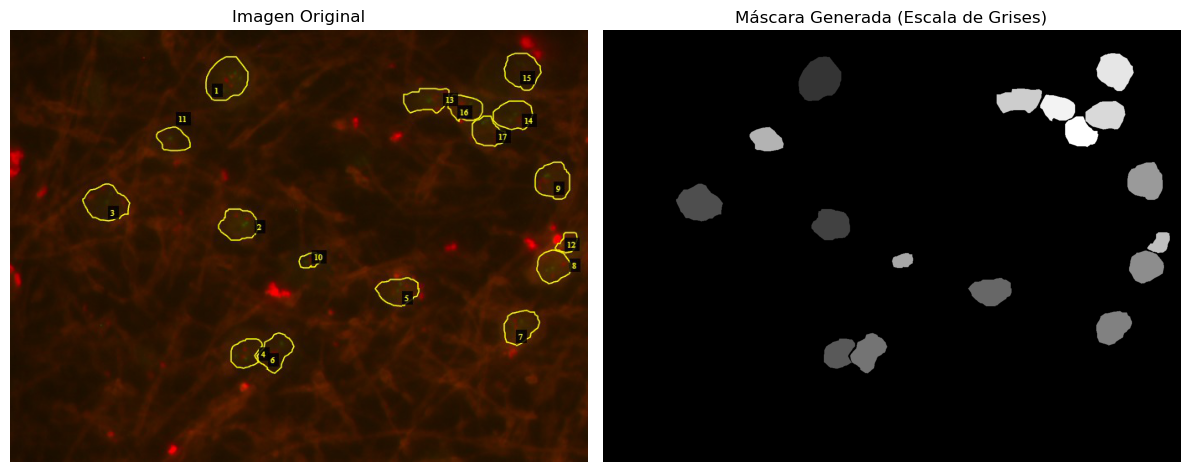

In [35]:
import json
import numpy as np
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

# Función para generar una etiqueta de imagen a partir de las coordenadas con escala de gris
def generar_etiquetas_imagen_con_resolucion(json_path, ruta_original, output_folder):
    # Cargar el archivo JSON
    with open(json_path, 'r') as file:
        data = json.load(file)

    # Cargar la imagen original para obtener sus dimensiones
    imagen_original = Image.open(ruta_original)
    imagen_original = imagen_original.convert("RGB")  
    ancho_original, alto_original = imagen_original.size

    # Iterar sobre cada imagen en el JSON
    for img_key, img_data in data.items():
        filename = img_data.get("filename", "unknown")
        width = img_data.get("width", 1392)  # Usar las dimensiones de la imagen en el JSON
        height = img_data.get("height", 1040)  # Usar las dimensiones de la imagen en el JSON
        regions = img_data.get("regions", [])
        
        # Crear una imagen en blanco para la máscara con las dimensiones exactas de la imagen
        mask = Image.new('L', (width, height), 0)  # 'L' significa imagen en escala de grises
        draw = ImageDraw.Draw(mask)

        # Establecer el color inicial (gris oscuro)
        color_base = 50  # Gris oscuro inicial
        step = (255 - color_base) / len(regions)  # Ajustar la intensidad de gris por cada célula

        # Iterar sobre cada región para dibujarla
        for i, region in enumerate(regions):
            shape_attributes = region.get("shape_attributes", {})
            all_points_x = shape_attributes.get("all_points_x", [])
            all_points_y = shape_attributes.get("all_points_y", [])

            # Calcular el valor de gris para esta región (de gris oscuro a blanco)
            intensity = int(color_base + i * step)  # Incrementar la intensidad por cada célula
            
            # Dibujar el polígono en la imagen de la máscara (con intensidad de gris)
            points = list(zip(all_points_x, all_points_y))
            draw.polygon(points, fill=intensity)  # Usar el valor calculado para el color

        # Guardar la máscara generada como PNG o JPG
        output_path = os.path.join(output_folder, f"{filename}_label.jpg")  # Cambia la extensión si prefieres JPG
        mask.save(output_path, "JPEG")
        
        # Visualizar ambas imágenes (original y máscara) lado a lado con matplotlib
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Crear una figura con dos subgráficos

        # Convertir la imagen original de PIL a un array de NumPy para usar en matplotlib
        imagen_original_np = np.array(imagen_original)

        # Mostrar la imagen original en el primer subgráfico
        axes[0].imshow(imagen_original_np)
        axes[0].set_title("Imagen Original")
        axes[0].axis('off')  # Ocultar los ejes

        # Mostrar la máscara generada en el segundo subgráfico
        axes[1].imshow(mask, cmap='gray')  # Mostrar en escala de grises
        axes[1].set_title("Máscara Generada (Escala de Grises)")
        axes[1].axis('off')  # Ocultar los ejes

        # Mostrar las dos imágenes
        plt.tight_layout()
        plt.show()
    
# Ruta del archivo JSON de entrada
json_path = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/seg6.json"  # Cambia esto a la ruta de tu archivo JSON
ruta_original = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/img6_seg.jpg"  # Ruta a la imagen original (la que quieres que tenga la misma resolución)
# Carpeta de salida para las imágenes de etiquetas
output_folder = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/Labels"  # Cambia esto si prefieres otro nombre de carpeta

# Llamar a la función para generar las imágenes de etiquetas con la resolución de la imagen original
generar_etiquetas_imagen_con_resolucion(json_path, ruta_original, output_folder)

In [36]:
import os
from PIL import Image

# Función para convertir imágenes de JPG a TIFF
def convertir_jpg_a_tiff(carpeta_entrada, carpeta_salida):
    # Asegurarse de que la carpeta de salida exista
    os.makedirs(carpeta_salida, exist_ok=True)
    
    # Iterar sobre todos los archivos en la carpeta de entrada
    for archivo in os.listdir(carpeta_entrada):
        if archivo.lower().endswith(".jpg") or archivo.lower().endswith(".jpeg"):  # Filtrar archivos JPG
            # Crear la ruta completa del archivo original
            ruta_jpg = os.path.join(carpeta_entrada, archivo)
            
            # Abrir la imagen usando PIL
            with Image.open(ruta_jpg) as imagen:
                # Convertir a modo RGB (para asegurar compatibilidad)
                imagen = imagen.convert("RGB")
                
                # Crear la ruta para la imagen TIFF
                nombre_base = os.path.splitext(archivo)[0]  # Quitar la extensión original
                ruta_tiff = os.path.join(carpeta_salida, f"{nombre_base}.tiff")
                
                # Guardar la imagen en formato TIFF sin compresión
                imagen.save(ruta_tiff, format="TIFF")
                print(f"Convertido: {archivo} -> {nombre_base}.tiff")

    print("\nTodas las imágenes se han convertido exitosamente.")

# Rutas de carpetas
carpeta_entrada = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/labels"   # Cambia esto por la carpeta donde están tus imágenes JPG
carpeta_salida = "C:/Users/walid/OneDrive/Desktop/Etiqutas_seg/labels_tiff"   # Carpeta donde se guardarán las imágenes TIFF

# Llamar a la función para realizar la conversión
convertir_jpg_a_tiff(carpeta_entrada, carpeta_salida)


Convertido: img10_label.jpg -> img10_label.tiff
Convertido: img11_label.jpg -> img11_label.tiff
Convertido: img12_label.jpg -> img12_label.tiff
Convertido: img13_label.jpg -> img13_label.tiff
Convertido: img14_label.jpg -> img14_label.tiff
Convertido: img15_label.jpg -> img15_label.tiff
Convertido: img16_label.jpg -> img16_label.tiff
Convertido: img17_label.jpg -> img17_label.tiff
Convertido: img1_label.jpg -> img1_label.tiff
Convertido: img2_label.jpg -> img2_label.tiff
Convertido: img3_label.jpg -> img3_label.tiff
Convertido: img4_label.jpg -> img4_label.tiff
Convertido: img5_label.jpg -> img5_label.tiff
Convertido: img6_label.jpg -> img6_label.tiff
Convertido: img7_label.jpg -> img7_label.tiff
Convertido: img8_label.jpg -> img8_label.tiff
Convertido: img9_label.jpg -> img9_label.tiff

Todas las imágenes se han convertido exitosamente.
